## 1.Business Understanding
This project deals with predicting whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on various medical measurements such as radius,texture,perimeter,area,smoothness,etc.

Early detection of breast cancer is critical for effective treatment. Machine learning models can assist doctors in identifying high-risk cases based on diagnostic measurements.

## 2.Data Understanding

#### Importing Libraries

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
import os
os.listdir()

['Breast-Cancer-Detection.ipynb', 'Data', 'README.md', 'requirements.txt']

#### Basic Information

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [39]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Drop Unnecessary Columns

In [ ]:
print(df.columns)

df.drop(columns=['id','Unnamed: 32'],inplace=True,errors='ignore')

X = df.drop('diagnosis',axis=1)
y = df['diagnosis'].map({'M':1,'B':0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### Check Target Distribution

In [46]:
df['diagnosis'].value_counts()    
# M = Malignant
# B = Benign

diagnosis
0    357
1    212
Name: count, dtype: int64

#### Correlation Matrix

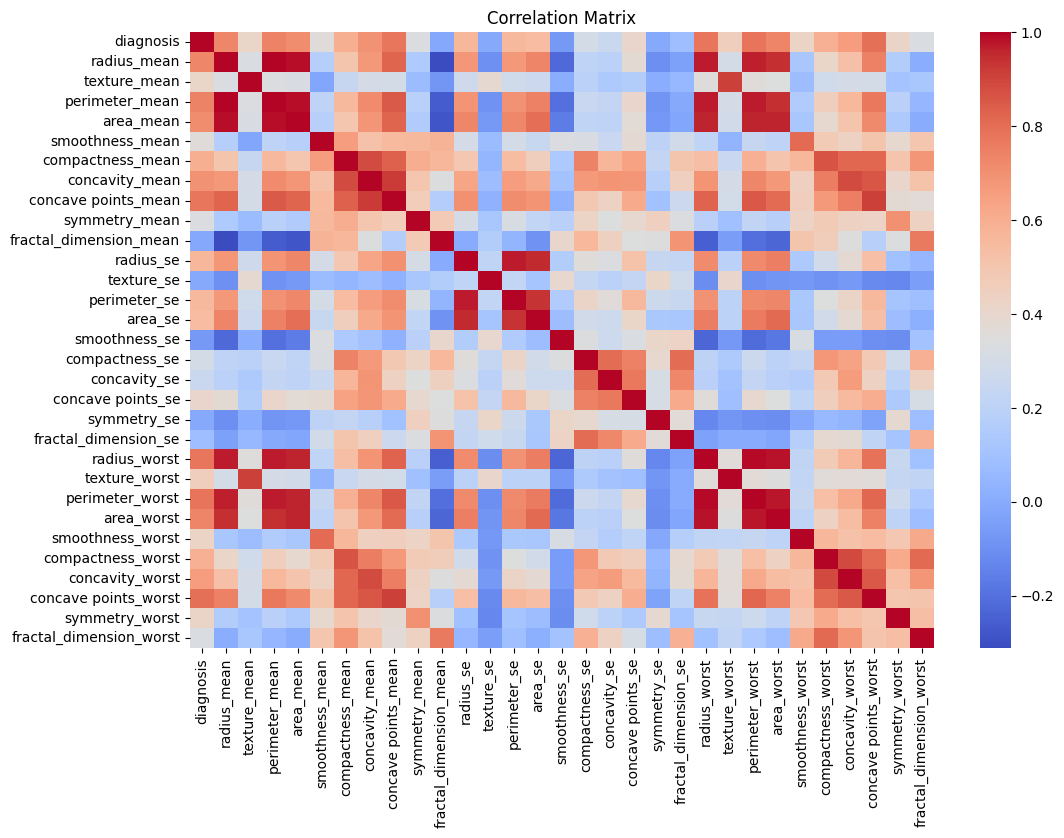

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 3.Data Preparation

#### Check Missing Values

In [49]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Check Duplicates

In [50]:
df.duplicated().any()

np.False_

In [51]:
# if its true then this
df = df.drop_duplicates() 

### Outlier Handling

Outliers were removed using the IQR (Interquartile Range) method.
Extreme values outside 1.5 × IQR were eliminated to improve model performance and reduce noise.

In [53]:
# Define continuous columns (all except target)
cont_val = df.drop('diagnosis',axis=1).columns

# Calculate IQR
Q1 = df[cont_val].quantile(0.25)
Q3 = df[cont_val].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[cont_val] < (Q1 - 1.5 * IQR)) |
          (df[cont_val] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(398, 31)

## 4.Data Preprocessing

#### Encode Target Variable

In [55]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df['diagnosis'].value_counts()

Series([], Name: count, dtype: int64)

#### Divide into Categorical and Continuous

In [56]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

cate_val
cont_val

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### Feature Scaling

In [57]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,NaN,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,NaN,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,NaN,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,NaN,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,NaN,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [58]:
st = StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,NaN,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,...,2.413510,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092
7,NaN,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,...,0.610898,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076
10,NaN,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,...,1.270617,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490
11,NaN,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,...,1.651581,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655
13,NaN,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,...,0.542758,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598


In [59]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,NaN,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,...,2.413510,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092
7,NaN,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,...,0.610898,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076
10,NaN,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,...,1.270617,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490
11,NaN,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,...,1.651581,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655
13,NaN,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,...,0.542758,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598


### Train Split

In [60]:
X = df.drop('diagnosis',axis=1)

In [61]:
y = df['diagnosis']

In [62]:
X_train, X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

## 5.EDA(Exploratory Data Analysis )

### Target Distribution

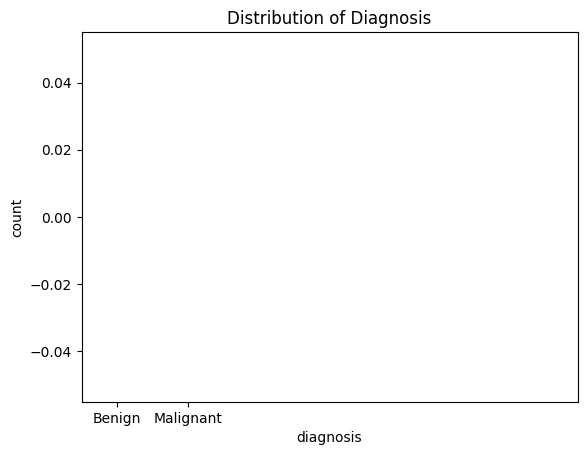

In [77]:
sns.countplot(x='diagnosis', data=df)
plt.xticks([0,1], ['Benign','Malignant'])
plt.title("Distribution of Diagnosis")
plt.show()

### Radius Distribution

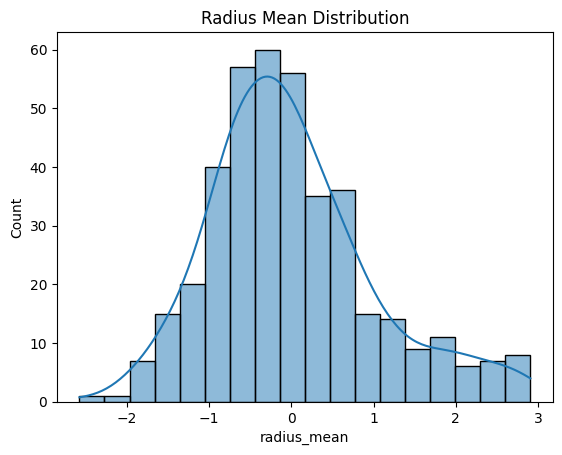

In [76]:
sns.histplot(df['radius_mean'],kde=True)
plt.title("Radius Mean Distribution")
plt.show()

### Texture Distribution by Diagnosis

In [81]:
print(df.shape)
print(df['diagnosis'].unique())
print(df['diagnosis'].dtype)


(398, 31)
[nan]
float64


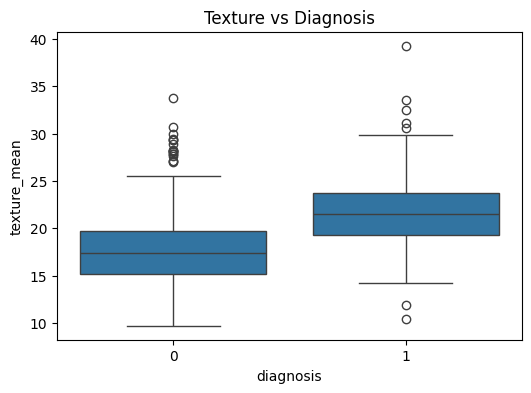

In [84]:
df = pd.read_csv('data/data.csv')
df.drop(columns=['id','Unnamed: 32'], inplace=True, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
plt.figure(figsize=(6,4))
sns.boxplot(x='diagnosis', y='texture_mean', data=df)
plt.title("Texture vs Diagnosis")
plt.show()

## 6.Model Selection

### This is a classification problem where we will test following three types : 
1.Logistic Regression

2.Decision Tree

3.Random Forest

### Logistic Regression

In [ ]:
df = pd.read_csv("data/data.csv")

df.drop(columns=['id','Unnamed: 32'], inplace=True, errors='ignore')

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = X.columns

numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

preprocessor =ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

log_reg_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [104]:
log_reg_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('logistic_regression',LogisticRegression())
])

log_reg_pipeline.fit(X_train,y_train)
y_pred_log =log_reg_pipeline.predict(X_test)

cv_scores =cross_val_score(log_reg_pipeline,X,y,cv=5,scoring='accuracy')
print("Mean CV Accuracy:",cv_scores.mean())

print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

Mean CV Accuracy: 0.9806862288464524
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Decision Tree

In [105]:
tree_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('decision_tree',DecisionTreeClassifier())
])

tree_pipeline.fit(X_train,y_train)
y_pred_tree =tree_pipeline.predict(X_test)

cv_scores1 =cross_val_score(tree_pipeline,X,y,cv=5)

print("Mean CV Accuracy:", cv_scores1.mean())
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

Mean CV Accuracy: 0.9173886042539978
[[66  5]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### Random Forest

In [106]:
rf_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('random_forest',RandomForestClassifier())
])

rf_pipeline.fit(X_train,y_train)
y_pred_rf =rf_pipeline.predict(X_test)

cv_scores2 = cross_val_score(rf_pipeline,X,y,cv=5)

print("Mean CV Accuracy:",cv_scores2.mean())
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Mean CV Accuracy: 0.9595870206489675
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Feature Importance Interpretation

The graph shows the most important features influencing the model's prediction.
Tumor size-related features such as radius_mean and perimeter_mean usually have high importance.

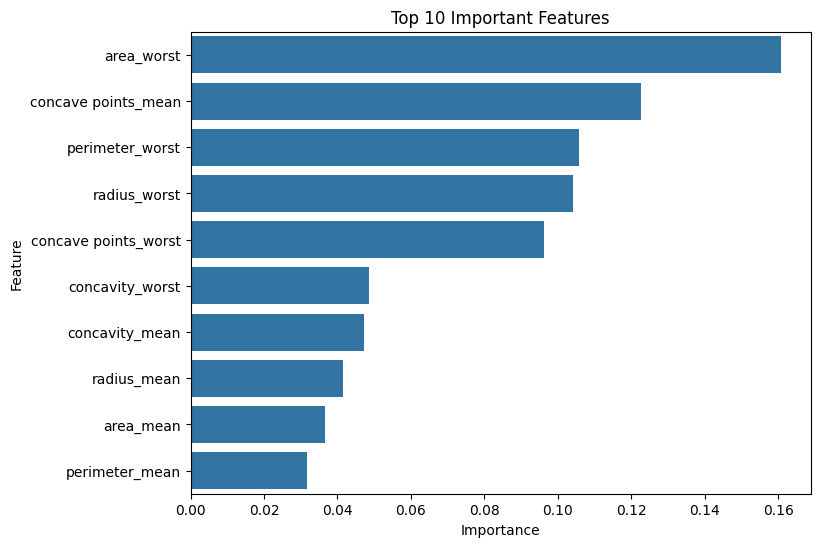

In [107]:
feature_importance = rf_pipeline.named_steps['random_forest'].feature_importances_

importance_df = pd.DataFrame({
    'Feature':X.columns,
    'Importance':feature_importance
}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance',y='Feature',data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

In [108]:
print(f"Logistic Regression Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Decision Tree Mean Accuracy: {cv_scores1.mean():.4f}")
print(f"Random Forest Mean Accuracy: {cv_scores2.mean():.4f}")

Logistic Regression Mean Accuracy: 0.9807
Decision Tree Mean Accuracy: 0.9174
Random Forest Mean Accuracy: 0.9596


### ROC Curve Interpretation

The ROC curve shows the trade-off between True Positive Rate and False Positive Rate.
A higher AUC value indicates better classification performance.

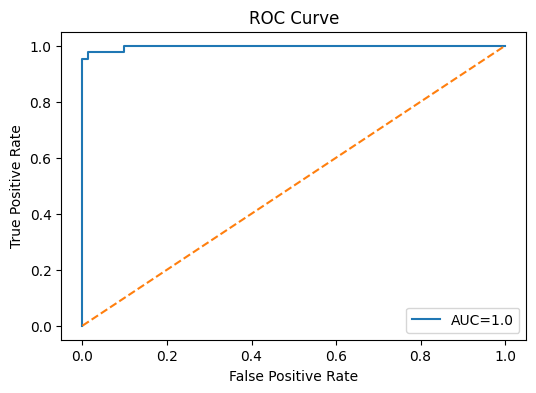

In [109]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC="+str(round(roc_auc,2)))
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Conclusion : 


##### Logistic Regression performed with high accuracy.

##### Random Forest also showed strong performance.

##### Decision Tree showed slightly lower performance due to overfitting.

Based on cross-validation accuracy,we select the best performing model.

In this manner Breast cancer diagnosis can be predicted effectively using machine learning techniques.

## 7.Prediction

In [111]:
sample = X_test.iloc[0:1]
prediction = log_reg_pipeline.predict(sample)

print("Predicted Diagnosis:",prediction)

Predicted Diagnosis: [0]


### Prediction Result

If the predicted value is:

- 0 → The tumor is predicted as Benign
- 1 → The tumor is predicted as Malignant

This demonstrates how the trained model can be used for real-world prediction.